In [16]:
# MNIST
# DataLoader, Transformation
# Multilayer neural net, activation function
# loss and optimizer
# training loop
# model evaluation
# gpu support

In [17]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.tensorboard import SummaryWriter
import sys

In [18]:
writer = SummaryWriter(f'runs/MNIST/trying_tensorboard1')

In [19]:
input_size = 784
hidden_size1 = 50
hidden_size2 = 50
num_classes = 10
num_epochs = 5
batch_size=100
learning_rate=0.003

In [20]:
train_dataset = torchvision.datasets.MNIST(root='./', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./', train=False, transform=transforms.ToTensor(), download=True)
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size=batch_size, shuffle= True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size=batch_size, shuffle= True)

In [21]:
print(train_dataset)
examples = iter(train_loader)
samples, labels = examples.next()
# samples = samples.reshape(-1, 28*28)
print(samples.shape, labels.shape)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./
    Split: Train
    StandardTransform
Transform: ToTensor()
torch.Size([100, 1, 28, 28]) torch.Size([100])


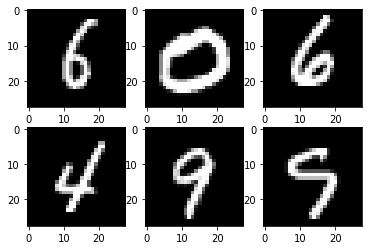

In [22]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0], cmap='gray')

In [23]:
img_grid = torchvision.utils.make_grid(samples)
writer.add_image("mnist_img", img_grid)
#writer.close()

In [24]:
class NeuralNet(nn.Module):
    def __init__(self,n_features,hidden_size1,hidden_size2, n_classes):
        super(NeuralNet, self).__init__()
        self.lin1 = nn.Linear(n_features, hidden_size1)
#         torch.nn.init.uniform_(self.lin1.weight)
#         torch.nn.init.normal_(self.lin1.bias)
        self.relu1 = nn.ReLU()
        self.lin2 = nn.Linear(hidden_size1,hidden_size2)
#         torch.nn.init.normal_(self.lin2.weight)
#         torch.nn.init.normal_(self.lin2.bias)
        self.relu2 = nn.ReLU()
        self.lin3 = nn.Linear(hidden_size2,n_classes)
#         torch.nn.init.normal_(self.lin3.weight)
#         torch.nn.init.normal_(self.lin3.bias)
        self.relu3 = nn.ReLU()
    def forward(self,x):
        out = self.lin1(x)
        out = self.relu1(out)
        out = self.lin2(out)
        out = self.relu2(out)
        out = self.lin3(out)
        out = self.relu3(out)
#         out = self.relu(self.lin1(x))
#         out = self.relu(self.lin2(out))
#         out = self.relu(self.lin3(out))
        return out

In [25]:
model = NeuralNet(input_size, hidden_size1, hidden_size2, num_classes)

In [26]:
writer.add_graph(model, samples.reshape(-1,28*28))

In [27]:
loss_criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

epochs :1/5, step: 200/600, loss : 0.6808329820632935
epochs :1/5, step: 400/600, loss : 0.7697356343269348
epochs :1/5, step: 600/600, loss : 0.7453455328941345
epochs :2/5, step: 200/600, loss : 0.674792468547821
epochs :2/5, step: 400/600, loss : 0.6961920261383057
epochs :2/5, step: 600/600, loss : 0.8232786059379578
epochs :3/5, step: 200/600, loss : 0.6905295848846436
epochs :3/5, step: 400/600, loss : 0.6377377510070801
epochs :3/5, step: 600/600, loss : 0.8442188501358032
epochs :4/5, step: 200/600, loss : 0.7145753502845764
epochs :4/5, step: 400/600, loss : 0.6289747357368469
epochs :4/5, step: 600/600, loss : 0.7666168212890625
epochs :5/5, step: 200/600, loss : 0.6065517663955688
epochs :5/5, step: 400/600, loss : 0.6805638670921326
epochs :5/5, step: 600/600, loss : 0.7324584722518921


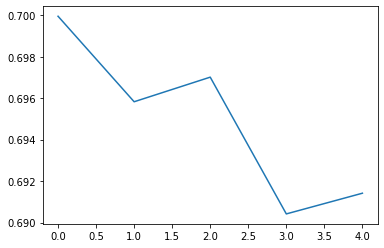

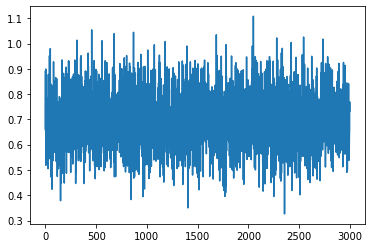

In [32]:
n_total_epochs = len(train_loader)
loss_vals1 =[]
loss_vals = []
for epoch in range(num_epochs):
    epoch_loss = []
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1,28*28)
        outputs = model(images)
        loss = loss_criterion(outputs, labels)
        loss.backward()
        epoch_loss.append(loss.item())
        loss_vals1.append(loss.item())
        optimizer.step()
        optimizer.zero_grad()
        if (i+1) % 200 ==0 :
            print(f'epochs :{epoch+1}/{num_epochs}, step: {i+1}/{n_total_epochs}, loss : {loss}')
    loss_vals.append(sum(epoch_loss)/len(epoch_loss))
plt.plot(range(num_epochs),loss_vals)
plt.show()
plt.plot(range(len(loss_vals1)),loss_vals1)
plt.show()

In [33]:

with torch.no_grad():
    n_correct=0
    n_samples=0
    for images, labels in test_loader:
        images = images.reshape(-1,28*28)
        outputs = model(images)
        _, predictions = torch.max(outputs, 1)
        n_samples+=labels.shape[0]
        n_correct = (predictions == labels).sum().item()
    acc = 100.0 * n_correct/n_samples
    print(f'accuracy = {acc}')

accuracy = 0.74


In [30]:
# for param in model.parameters():
#     print(f'param size: {param.shape},      param : {param}')